In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('./Data/covid19_articles_20201231.csv')

# Date to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop duplicates
num_articles_pre_drop = len(df)
df = df.drop_duplicates(subset='content')
df = df.reset_index(drop=True)
print('no. articles dropped: ', num_articles_pre_drop - len(df))
print('no. of articles: ', len(df))
print(df.info())

no. articles dropped:  127
no. of articles:  368920
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368920 entries, 0 to 368919
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   author      181789 non-null  object        
 1   date        368920 non-null  datetime64[ns]
 2   domain      368920 non-null  object        
 3   title       368835 non-null  object        
 4   url         368920 non-null  object        
 5   content     368920 non-null  object        
 6   topic_area  368920 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 19.7+ MB
None


In [10]:
df.head(3)

,author,date,domain,title,url,content,topic_area
0,Thomas Hughes,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,With the end of the year just around the corne...,business
1,Thomas Hughes,2020-01-03,marketbeat,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,The labor markets were one of the most closely...,business
2,Steve Anderson,2020-01-03,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,"It could be forgiven, that some might think th...",business


### Number of Articles per website

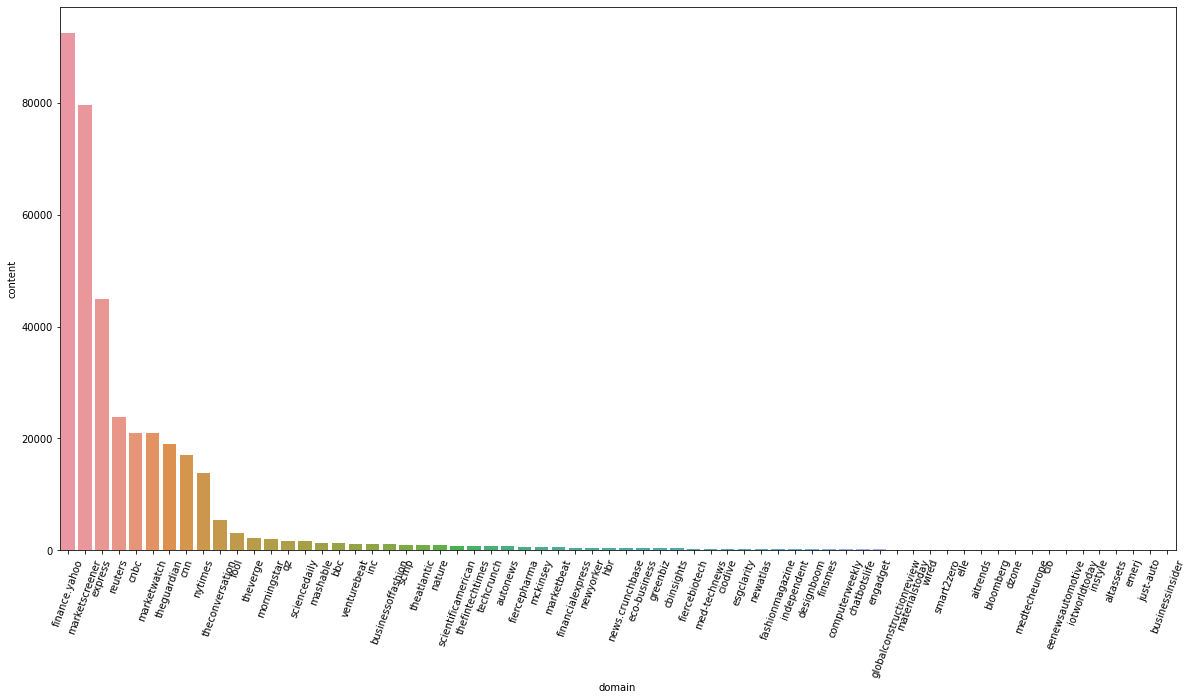

In [42]:
# Articles by domain
count_domain = df.groupby('domain')['content'].count().sort_values(ascending=False)
count_domain = pd.DataFrame(count_domain.reset_index())

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = 'domain', y = 'content', data = count_domain)
plt.xticks(rotation=70)
None

### Articles that are annual reports

In [74]:
annual_reports = df[df['title'].str.contains("Annual Report", na=False)].reset_index()
annual_reports

,index,author,date,domain,title,url,content,topic_area
0,4986,NaN,2020-02-13,marketscreener,Woodside Petroleum : Full-Year 2019 Results Br...,https://www.marketscreener.com/quote/stock/WOO...,ASX Announcement Woodside Petroleum Ltd. ACN 0...,business
1,8499,NaN,2020-02-27,marketscreener,PPHE Hotel : Annual Results & Publication of A...,https://www.marketscreener.com/PPHE-HOTEL-GROU...,27 February 2020 PPHE HOTEL GROUP LIMITED\n ...,business
2,8913,NaN,2020-02-27,marketscreener,Acushnet : Annual Report,https://www.marketscreener.com/quote/stock/ACU...,Table of Contents UNITED STATES SECURITIES AND...,business
3,10848,NaN,2020-03-03,marketscreener,Apax Global Alpha : 2019 Annual Report and Acc...,https://www.marketscreener.com/APAX-GLOBAL-ALP...,RNS Number : 7690E Apax Global Alpha Limited 0...,business
4,10906,NaN,2020-03-03,marketscreener,Københavns Lufthavne A/S : Annual Report for 2019,https://www.marketscreener.com/K-BENHAVNS-LUFT...,"Company AnnouncementCopenhagen, 3 March 2020 A...",business
...,...,...,...,...,...,...,...,...
269,358970,NaN,2020-12-10,marketscreener,Costco Wholesale : FY 2020 Annual Report 2.6 MB,https://www.marketscreener.com/quote/stock/COS...,2020 ANNUAL REPORT FISCAL YEAR ENDED AUGUST 30...,business
270,360515,NaN,2020-12-14,marketscreener,Getech : 2019 Annual Report & Accounts,https://www.marketscreener.com/quote/stock/GET...,d a t a Getech Group plc ANNUAL REPORT k n o w...,business
271,361020,NaN,2020-12-15,marketscreener,Chemring : Annual Report and Accounts 2020,https://www.marketscreener.com/quote/stock/CHE...,Chemring Group PLC Annual report and accounts ...,business
272,361891,NaN,2020-12-16,marketscreener,Scotts Miracle Gro : 2020 Annual Report,https://www.marketscreener.com/quote/stock/THE...,The Scotts Miracle-Gro Company 2020 Annual Rep...,business


In [75]:
annual_reports[:2]

,index,author,date,domain,title,url,content,topic_area
0,4986,NaN,2020-02-13,marketscreener,Woodside Petroleum : Full-Year 2019 Results Br...,https://www.marketscreener.com/quote/stock/WOO...,ASX Announcement Woodside Petroleum Ltd. ACN 0...,business
1,8499,NaN,2020-02-27,marketscreener,PPHE Hotel : Annual Results & Publication of A...,https://www.marketscreener.com/PPHE-HOTEL-GROU...,27 February 2020 PPHE HOTEL GROUP LIMITED\n ...,business


In [88]:
annual_report_lengths = []
for row in range(len(annual_reports)):
    annual_report_lengths.append(len(annual_reports.loc[row]['content']))

print(min(annual_report_lengths))
print(max(annual_report_lengths))
print((round(np.mean(annual_report_lengths),0)))

1171
857551
120195.0


### Long Articles

In [108]:
long_articles = df[df['content'].str.len() >= 100000]#.reset_index()
long_articles

,author,date,domain,title,url,content,topic_area
1626,NaN,2020-01-30,marketscreener,CDLHT: Announcement on the Unaudited Financial...,https://www.marketscreener.com/CITY-DEVELOPMEN...,CDL HOSPITALITY TRUSTS UNAUDITED FINANCIAL STA...,business
4132,NaN,2020-02-11,marketscreener,Ping An Healthcare and Technology : ANNOUNCEME...,https://www.marketscreener.com/PING-AN-HEALTHC...,Hong Kong Exchanges and Clearing Limited and T...,business
5616,NaN,2020-02-17,marketscreener,Petra Diamonds : Interim Results for the six m...,https://www.marketscreener.com/PETRA-DIAMONDS-...,"Petra Diamonds Limited (""Petra"", ""the Company""...",business
5718,NaN,2020-02-18,marketscreener,Intercontinental Hotels : Preliminary Results ...,https://www.marketscreener.com/quote/stock/INT...,Full Year Results to 31 December 2019 Reported...,business
6384,NaN,2020-02-20,marketscreener,KAZ MINERALS : AUDITED RESULTS FOR THE YEAR EN...,https://www.marketscreener.com/KAZ-MINERALS-PL...,KAZ MINERALS PLC 6TH FLOOR CARDINAL PLACE 100 ...,business
...,...,...,...,...,...,...,...
361427,NaN,2020-12-15,marketscreener,Ceconomy : Annual Financial Statements CECONOM...,https://www.marketscreener.com/quote/stock/CEC...,A N N U A L F I N A N C I A L S TAT E M E N T ...,business
361891,NaN,2020-12-16,marketscreener,Scotts Miracle Gro : 2020 Annual Report,https://www.marketscreener.com/quote/stock/THE...,The Scotts Miracle-Gro Company 2020 Annual Rep...,business
362483,NaN,2020-12-17,marketscreener,SSP : Preliminary Results 2020,https://www.marketscreener.com/quote/stock/SSP...,LEI:213800QGNIWTXFMENJ24 17 December 2020 SSP ...,business
362845,NaN,2020-12-17,marketscreener,Avivagen : 2020 Year End Financial Statements,https://www.marketscreener.com/quote/stock/AVI...,Avivagen Inc. Audited Financial Statements Oct...,business


In [107]:
article_idx = 975
print(len(df.loc[article_idx]['content']))
df.loc[article_idx]['content']

53861


"United Technologies Corp\xa0(NYSE:RTX)Q4\xa02019 Earnings CallJan 28, 2020, 8:00 a.m. ET Good morning and welcome to the United Technologies' Fourth Quarter 2019 Earnings Conference Call. On the call today are, Greg Hayes, Chairman and Chief Executive Officer; Neil Mitchill, Acting Senior Vice President and Chief Financial Officer; and Nathan Ware, Senior Director, Investor Relations. This call is being carried live on the Internet and there is a presentation available for download from UTC's website at www.utc.com. Please note, except where otherwise noted, the Company will speak to results from continuing operations, excluding restructuring costs and other significant items of a non-recurring and or non-operational nature, often referred to by management as other significant items. The Company also reminds listeners that the earnings and cash flow expectation and other forward-looking statements provided on this call are subject to risk and uncertainties. UTC's SEC filings including